# Project 3: Credit Card Default Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

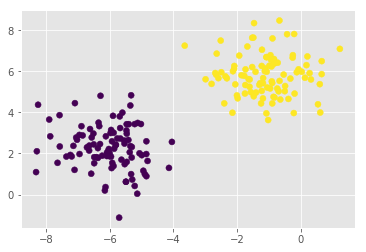

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=1234)
plt.scatter (X[:,0],X[:,1],c=Y)

In [34]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1.0).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=1.0).fit(X, Y)
lin_svc = svm.LinearSVC(C=1.0).fit(X, Y)

In [53]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [54]:
## concatenate numpy array:
## numpy.concatenate: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)),axis=1)

array([[-9.31746603, -2.12134124],
       [-9.29746603, -2.12134124],
       [-9.27746603, -2.12134124],
       ..., 
       [ 2.18253397,  9.45865876],
       [ 2.20253397,  9.45865876],
       [ 2.22253397,  9.45865876]])

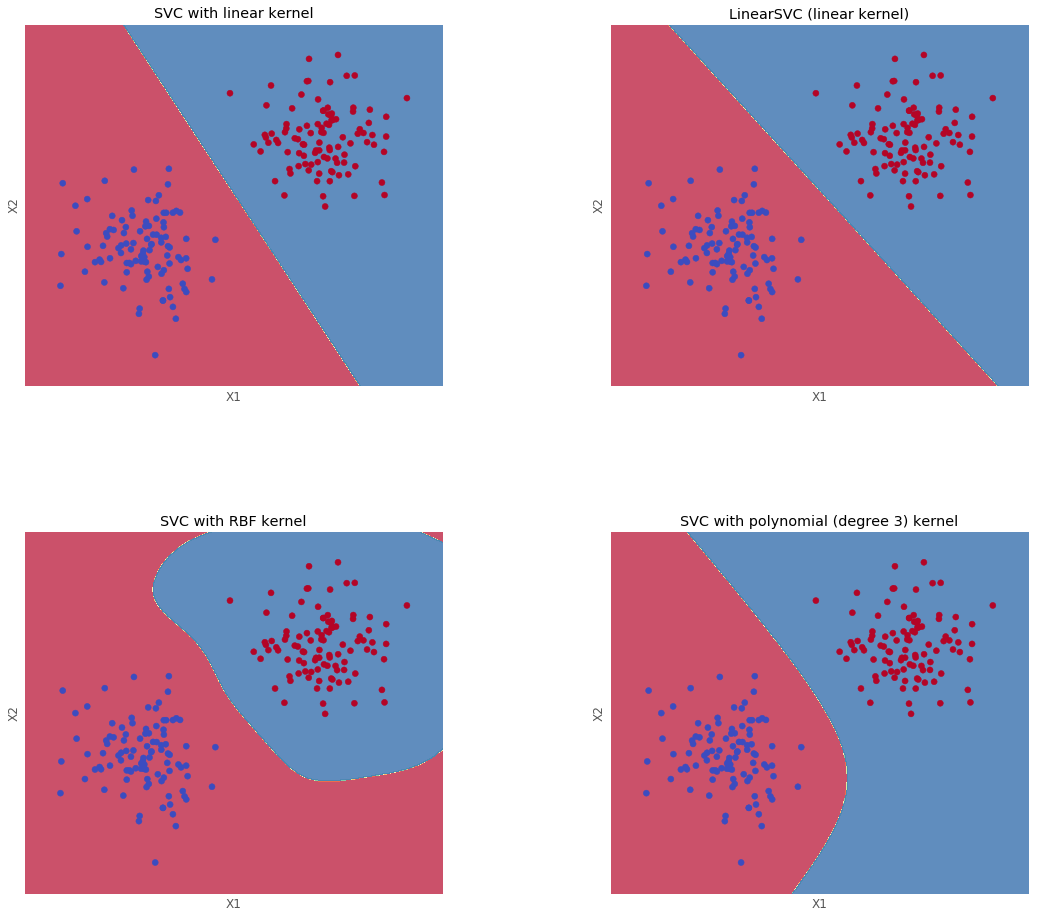

In [55]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

fig = plt.figure(figsize=(18, 16))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)),axis=1))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    # cmap=plt.cm.coolwarm，from color example code:
    # http://matplotlib.org/examples/color/colormaps_reference.html

    # Plot also the training points

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### 2. Following you will need to solve a Credit Card Default Detection Case

**Data Description:**

**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. 

**X6** = September, 2015, **X11** =April, 2015.

**-1** = pay one month ahead; **0** = pay on time; **1** = delay 1 month.

**X12 - X17**: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015; **X17** = amount of bill statementApril, 2015. 

**X18 - X23**: Amount of previous payment

**X18** = amount paid in September, 2015; **X23** = amount paid in April, 2015.

**Y**: A binary response of whether the customer is fraud (1) or not (0).

This is a real problem to classify multi-feature data into two groups.

**1. Load the data**

In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
print (train_data.shape)
print (test_data.shape)

(25000, 25)
(5000, 24)


In [7]:
train_data.columns

Index([u'id', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9',
       u'X10', u'X11', u'X12', u'X13', u'X14', u'X15', u'X16', u'X17', u'X18',
       u'X19', u'X20', u'X21', u'X22', u'X23', u'Y'],
      dtype='object')

In [8]:
train_data.iloc[0:10,6:12]

,X6,X7,X8,X9,X10,X11
0,0,0,0,0,0,0
1,0,0,0,2,0,0
2,0,0,0,0,0,0
3,1,-2,-2,-1,0,0
4,-1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,2
6,0,-1,-1,-1,0,-1
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,-2,-2,-2,-2,-2,-2


In [9]:
train_data.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [10]:
train_data.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

**2. Distinguish categorical and continuous variables**

In [11]:
cat_v = []
con_v = []
for c in train_data.columns:
    if len(train_data[c].value_counts().index)<=15:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [12]:
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

('The continuous variables: ', ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'], '\n')
('The categorical variables: ', ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'])


**3. Basic feature analysis**

i. Check the pattern differences between the training data and testing data

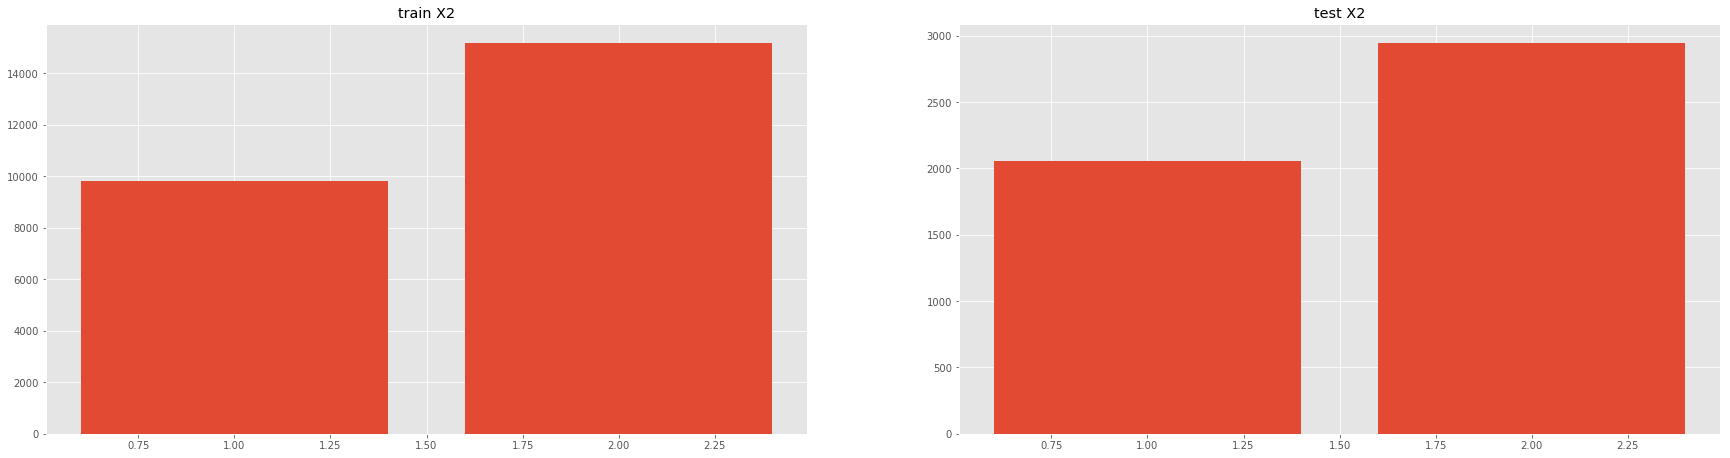

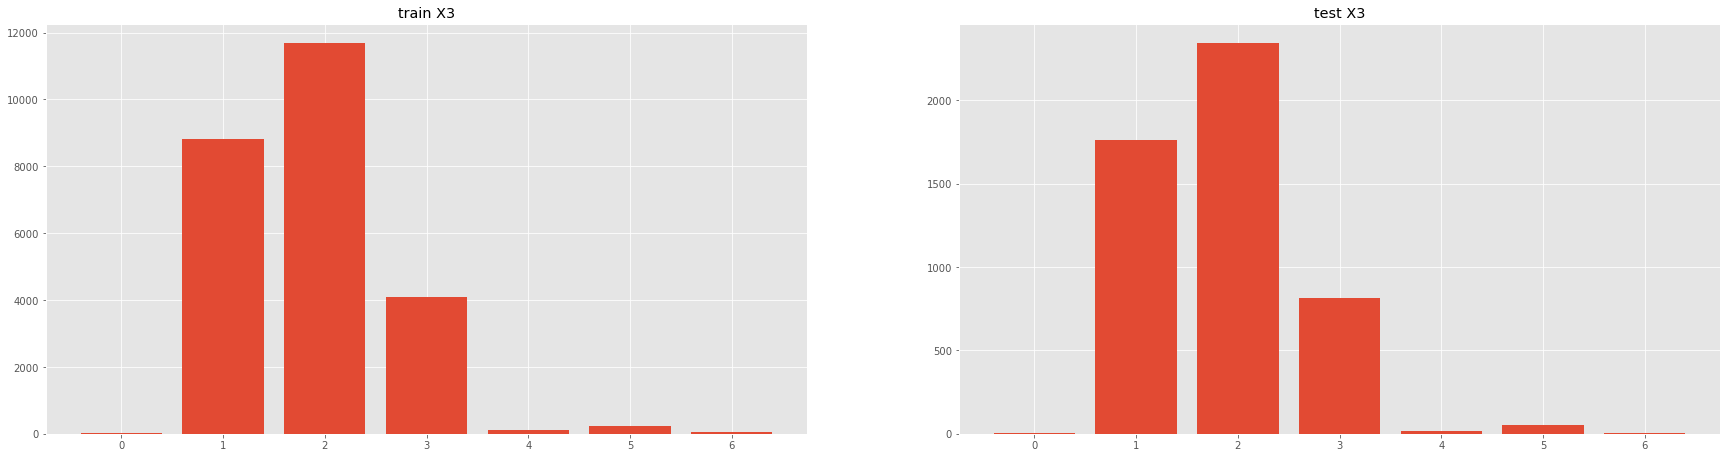

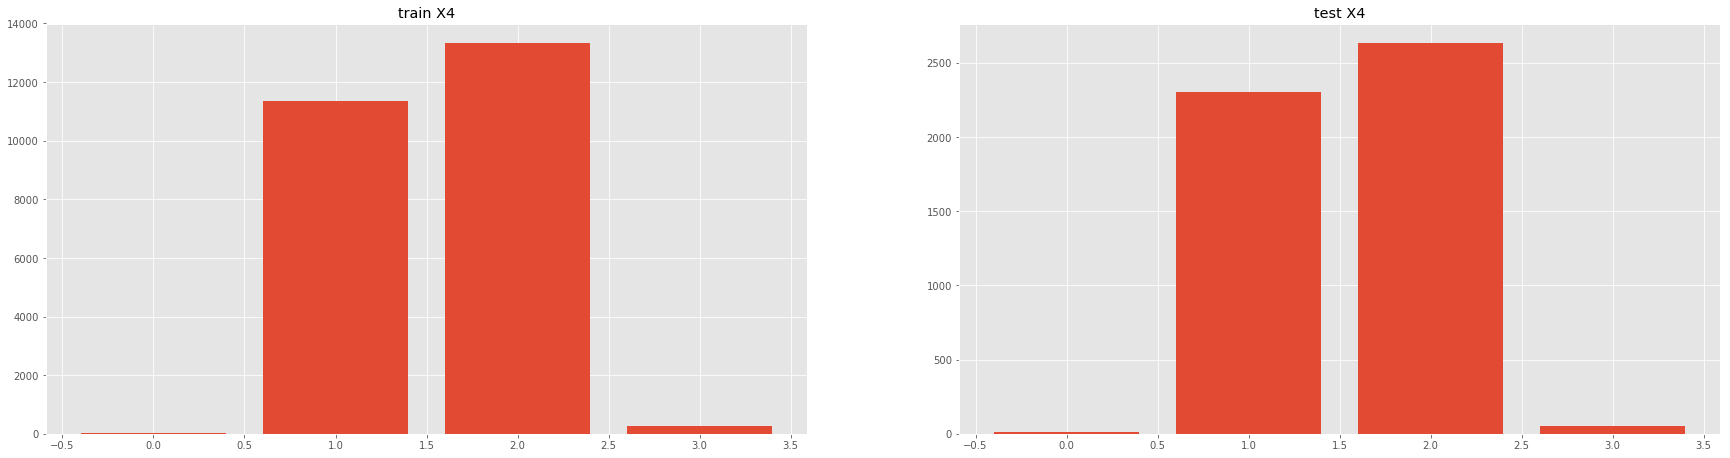

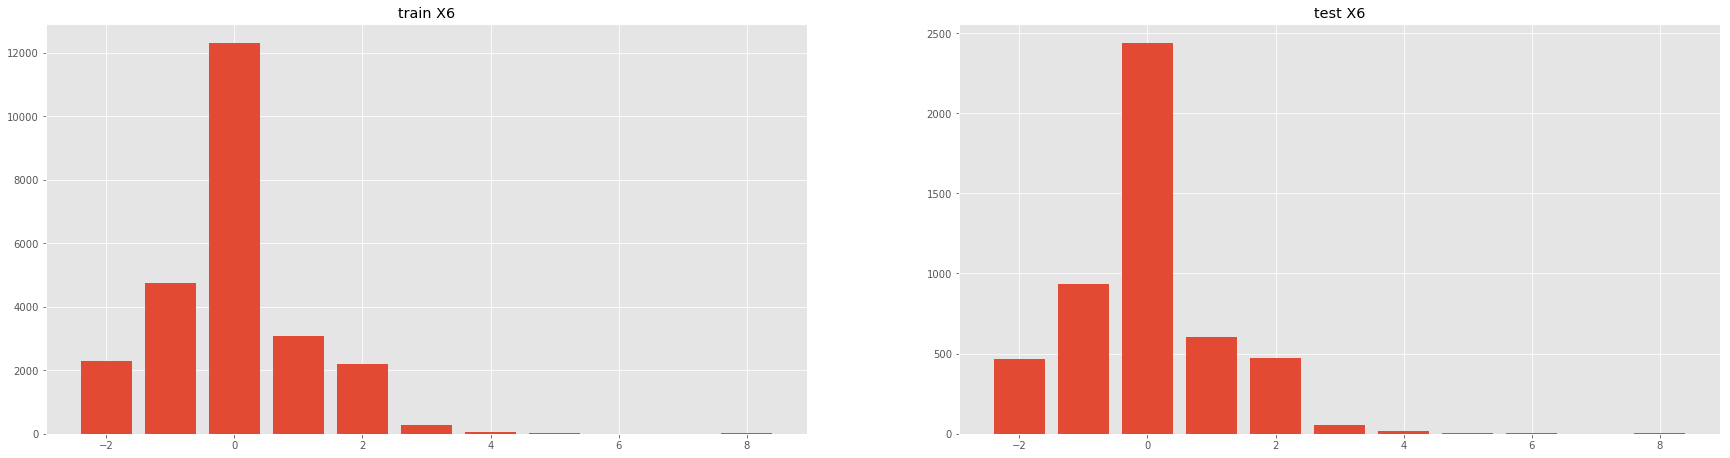

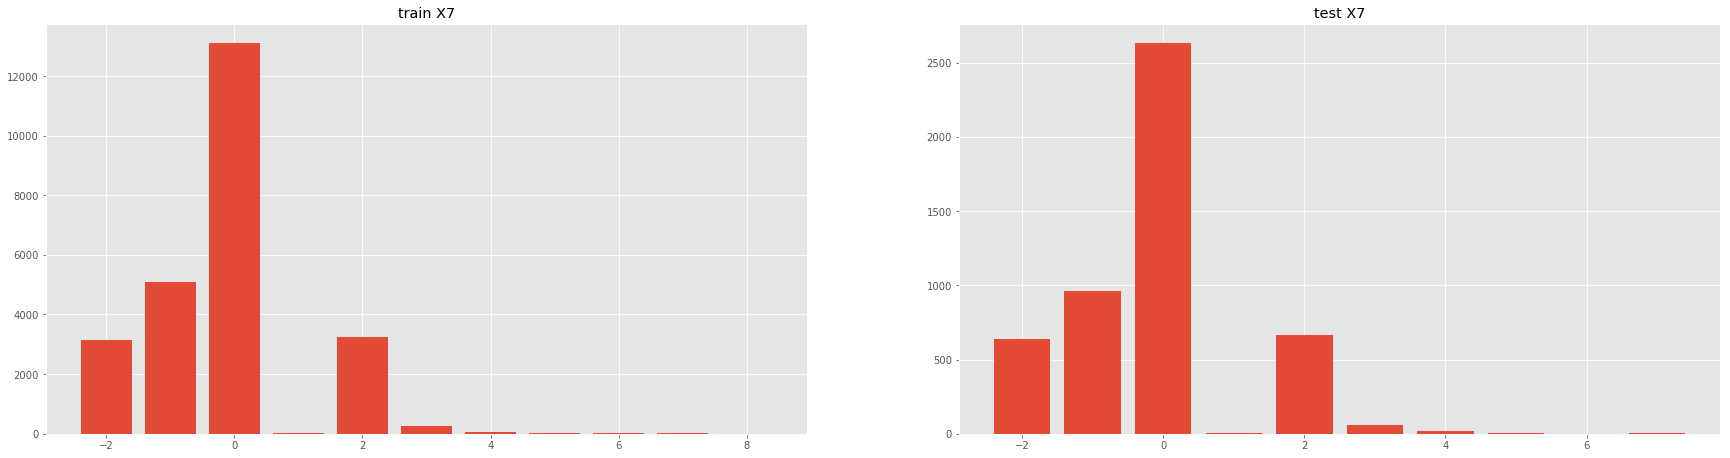

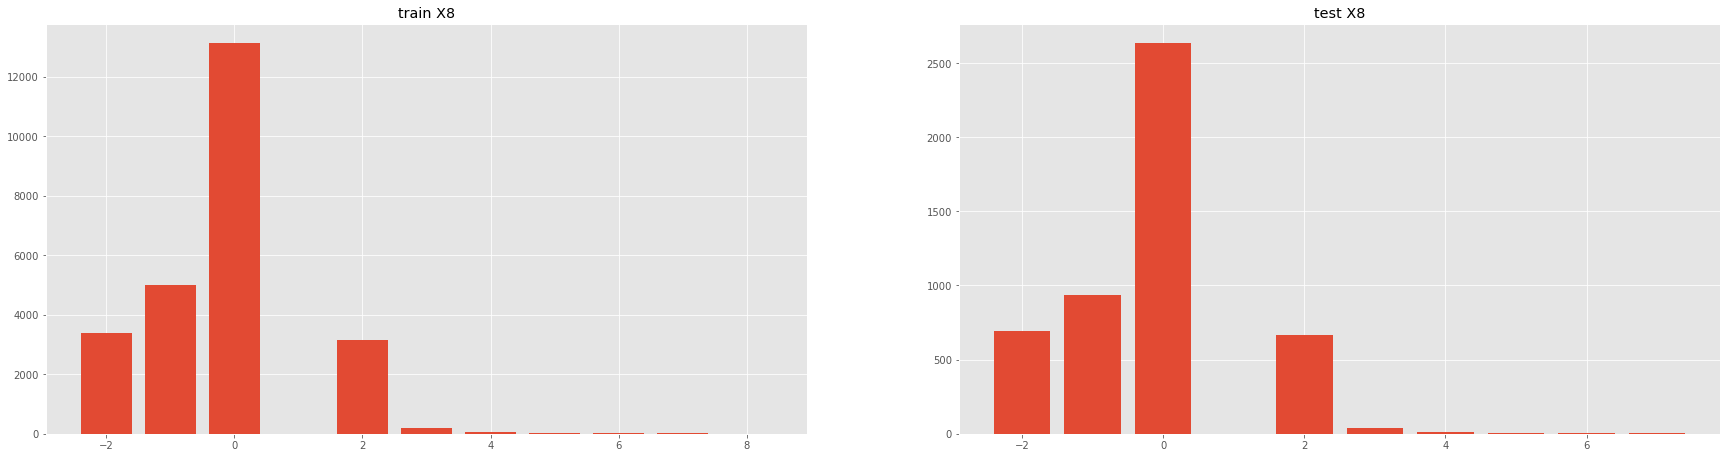

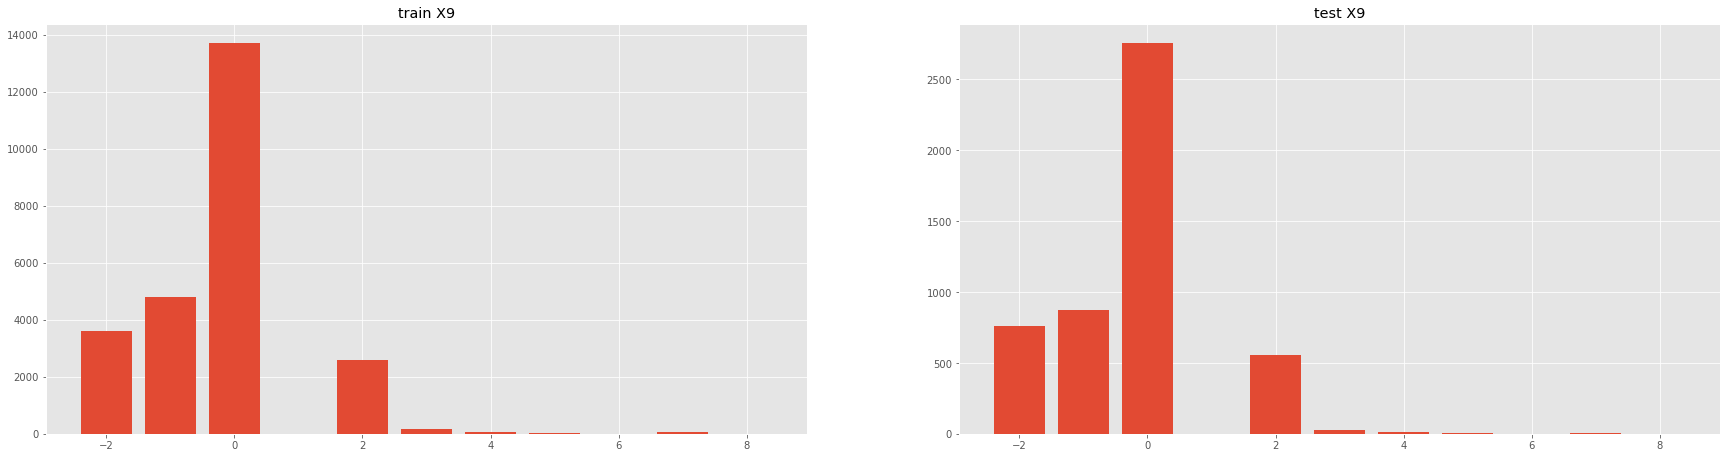

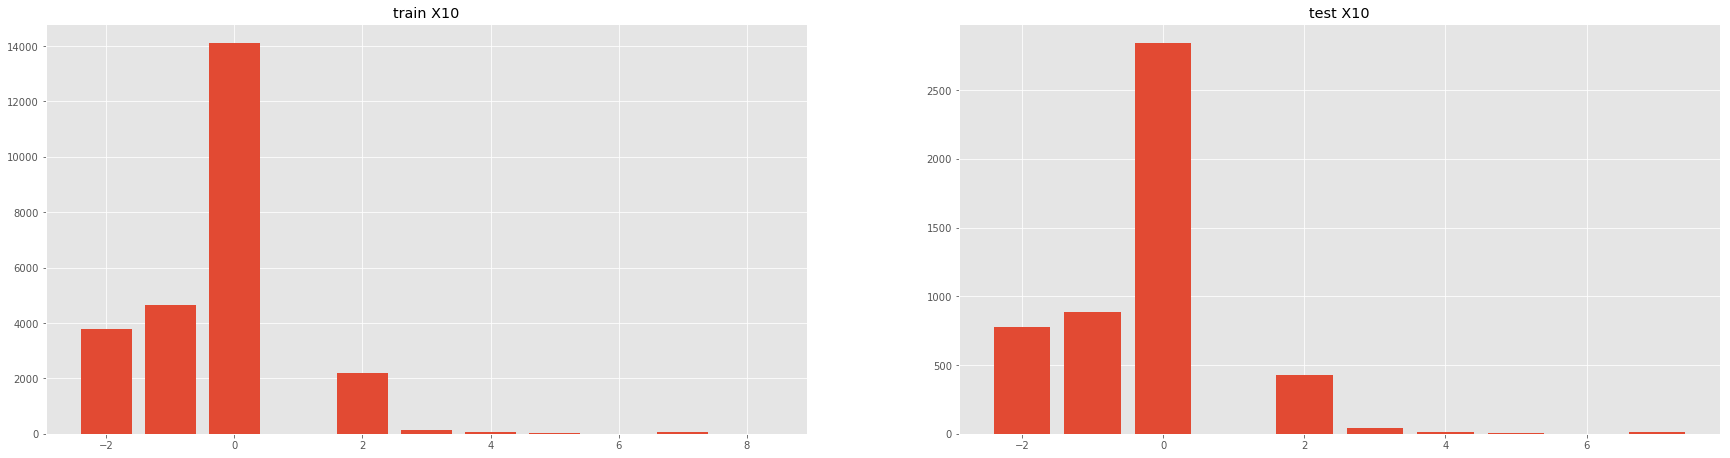

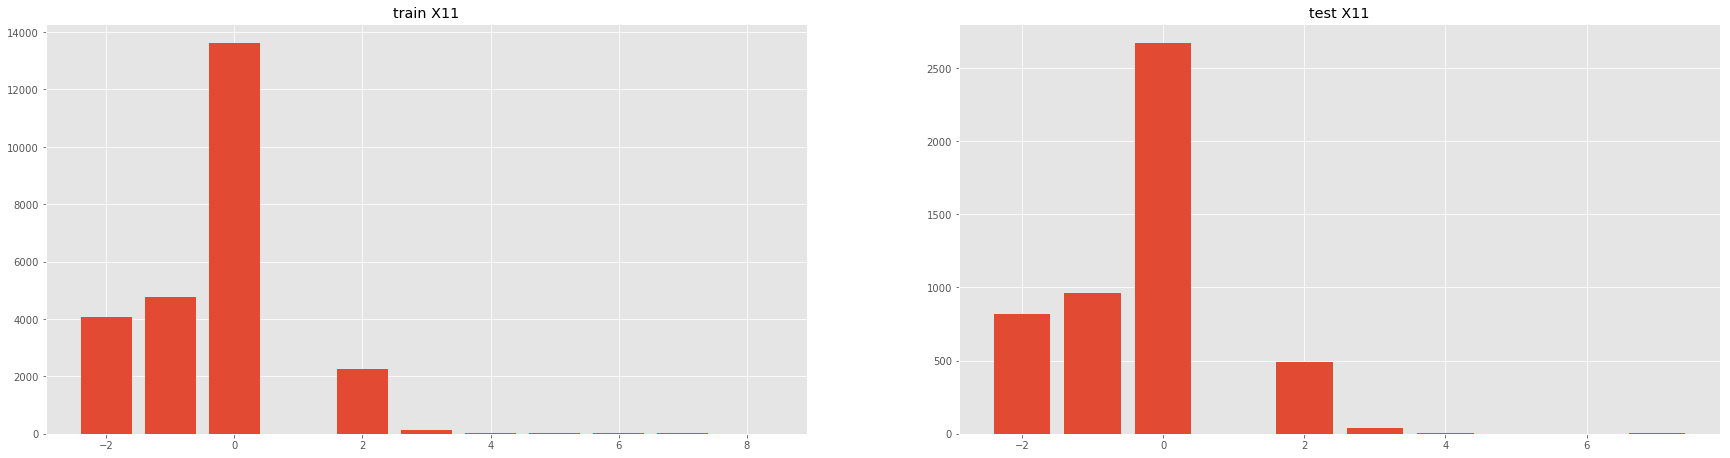

In [13]:
count=1
for i in range(len(cat_v)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(cat_v),2,count)
    plt.bar(train_data[cat_v[i]].value_counts().index, train_data[cat_v[i]].value_counts().values)
    plt.title("train "+cat_v[i])
    
    plt.subplot(len(cat_v),2,count+1)
    plt.bar(test_data[cat_v[i]].value_counts().index, test_data[cat_v[i]].value_counts().values)
    plt.title("test "+cat_v[i])
    count+=2

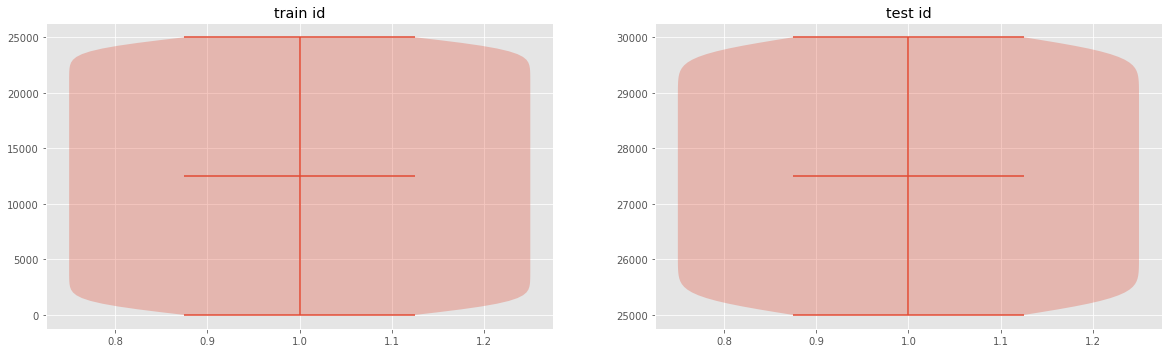

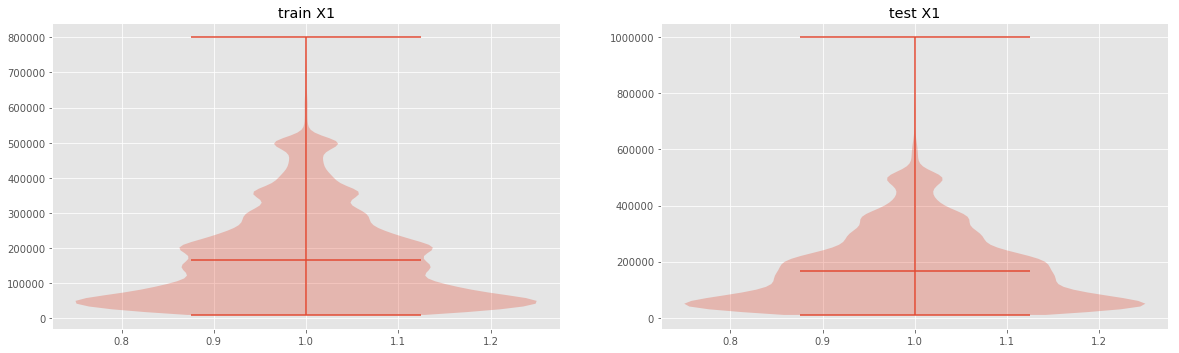

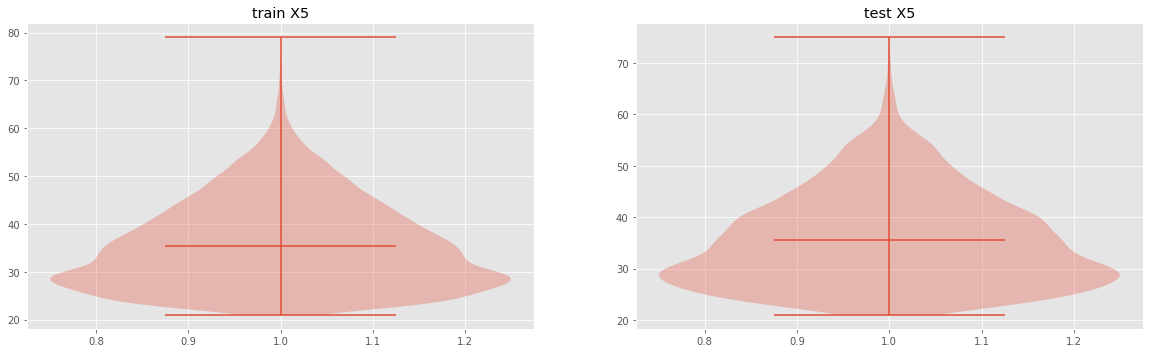

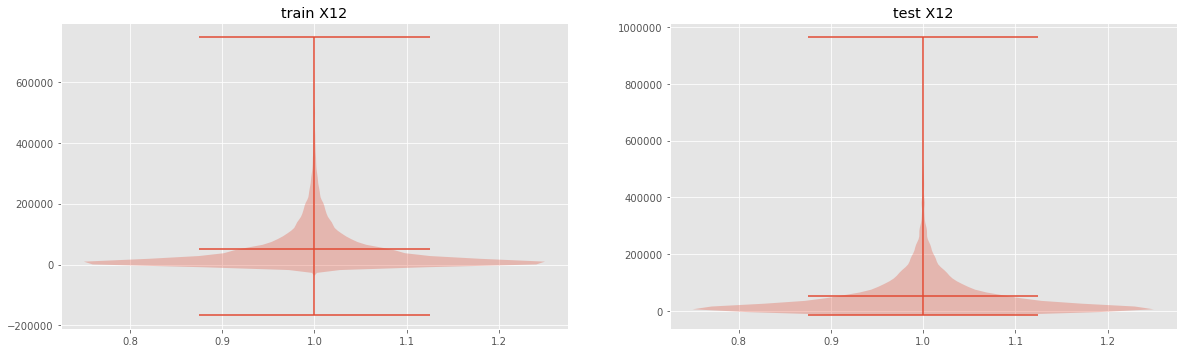

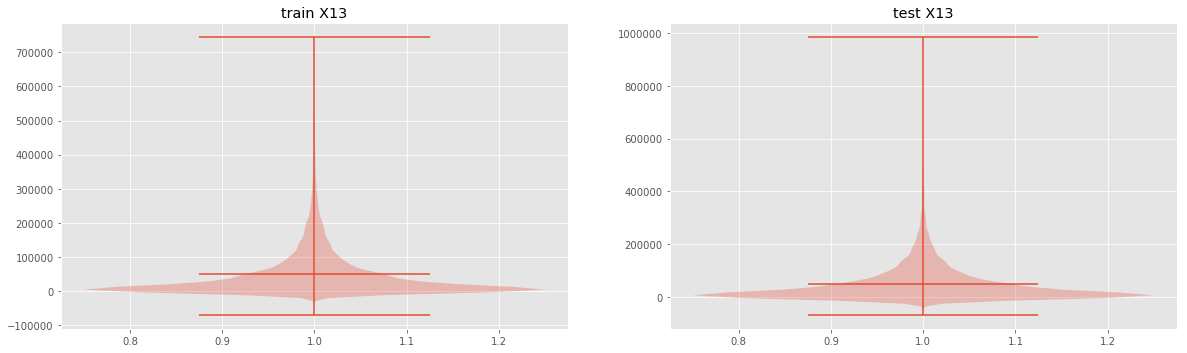

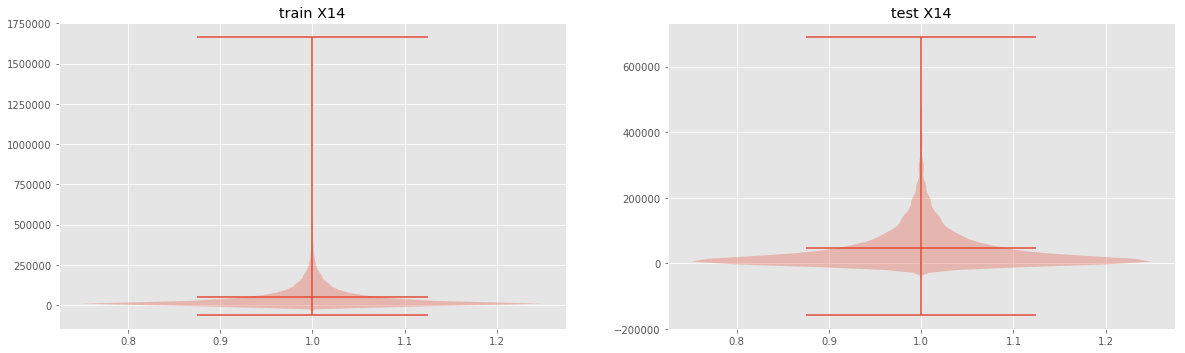

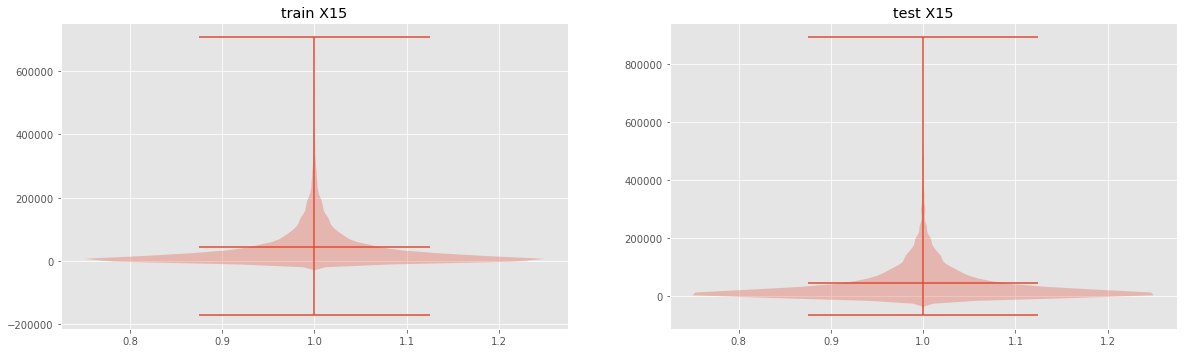

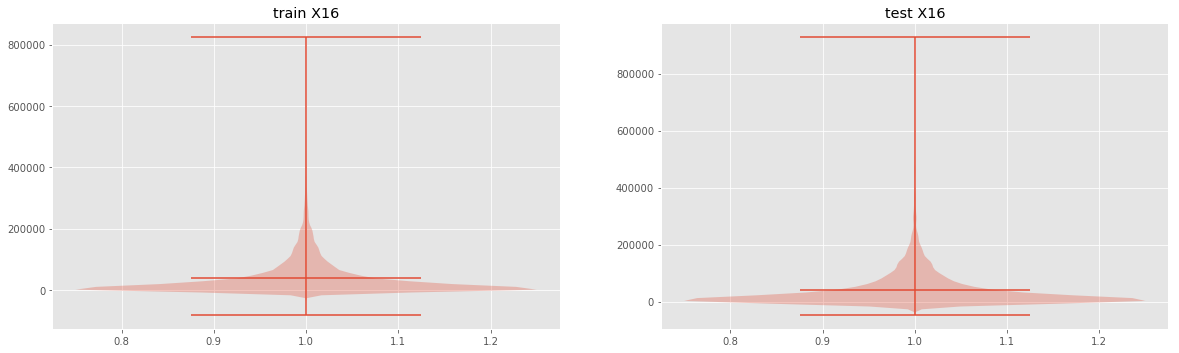

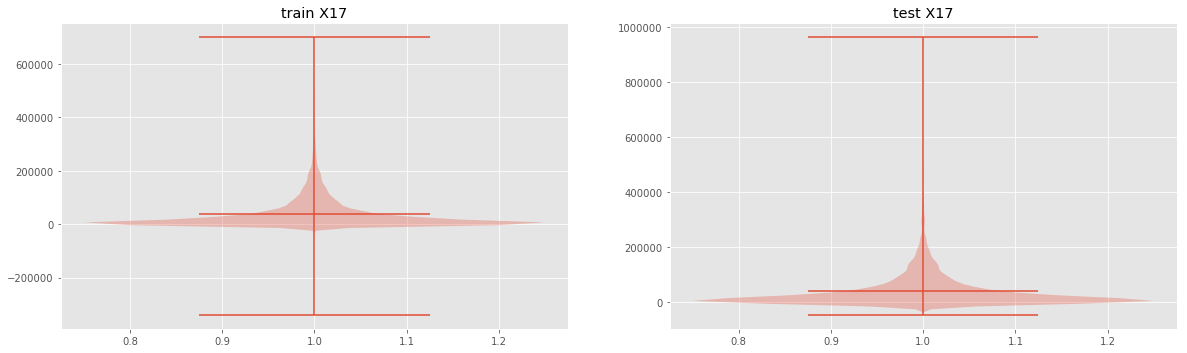

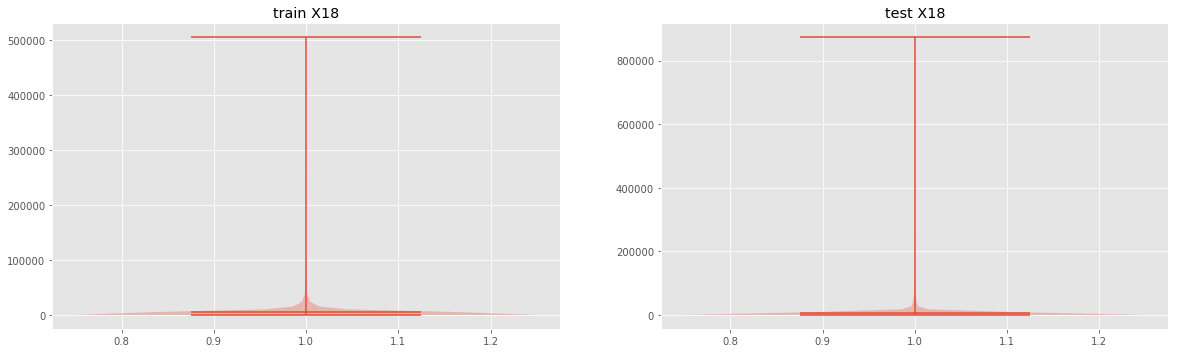

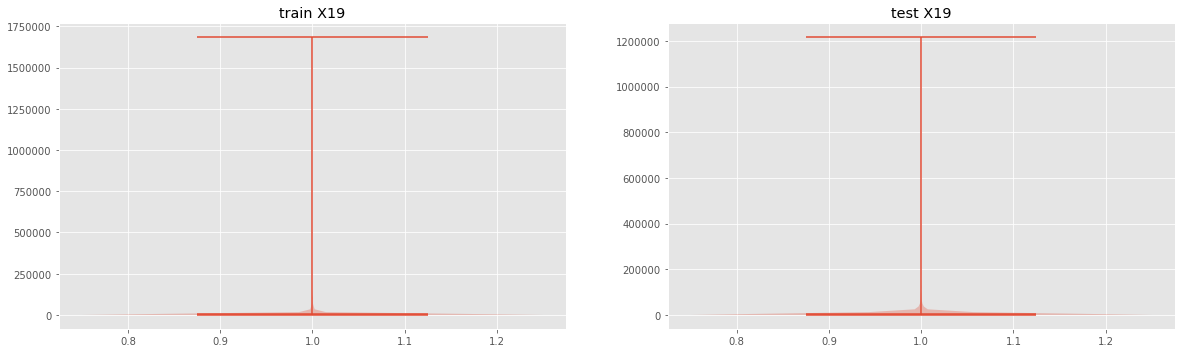

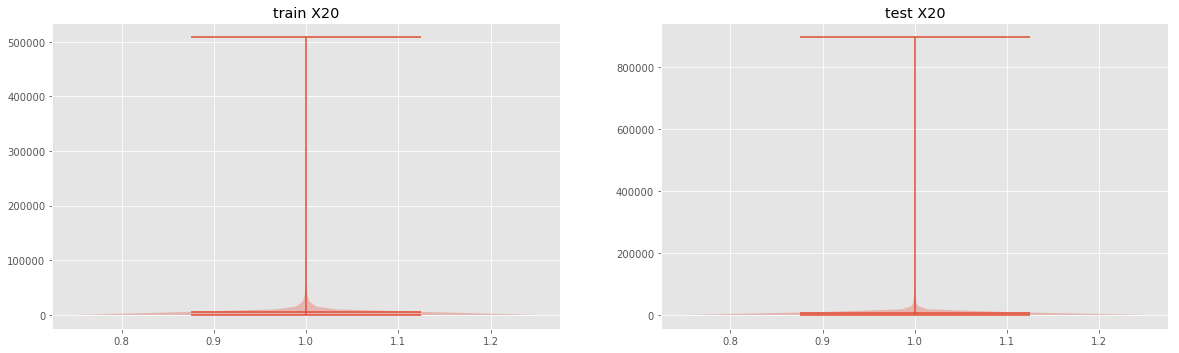

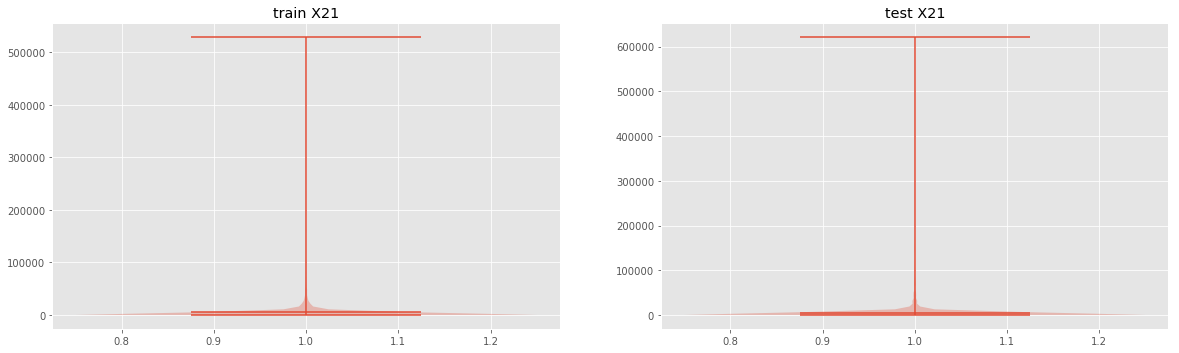

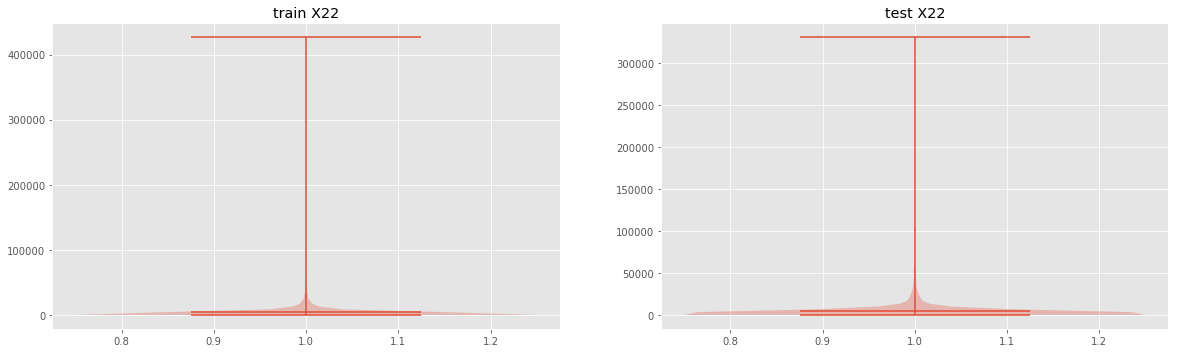

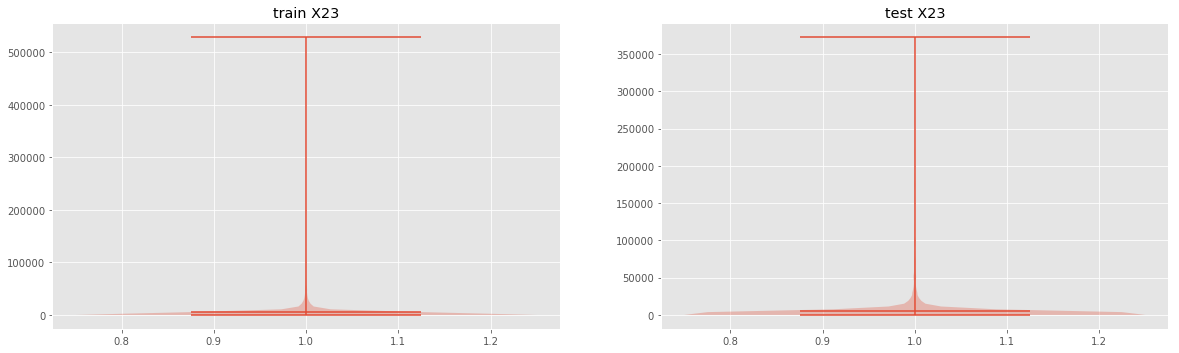

In [14]:
count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(train_data[con_v[i]],showmeans=True)
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(test_data[con_v[i]],showmeans=True)
    plt.title("test "+con_v[i])
    count+=2

ii. Check the if there are linear relationships between features

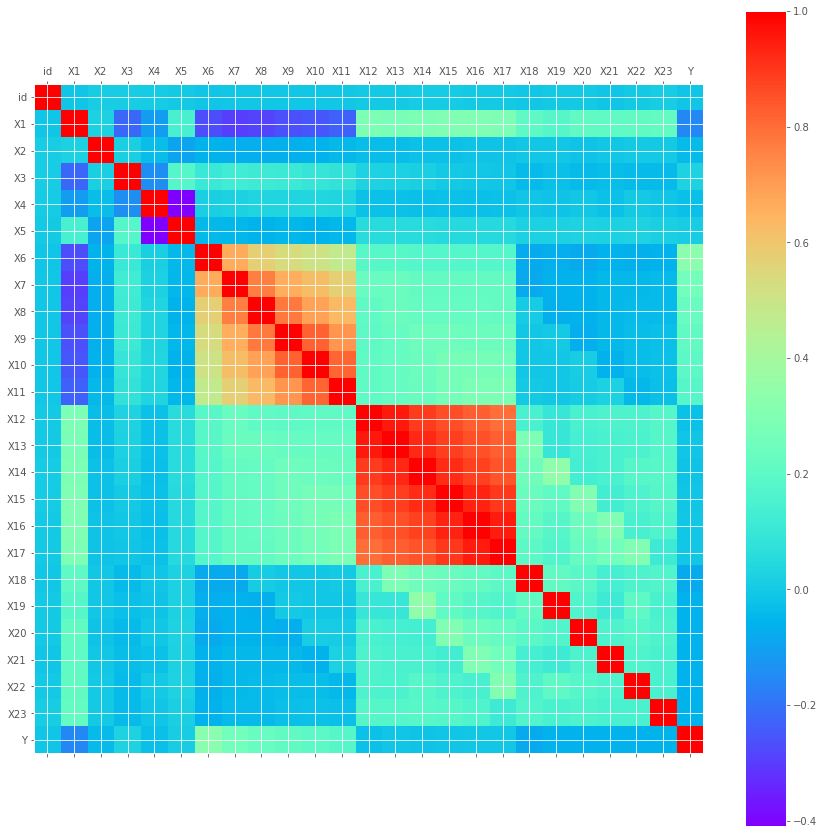

In [15]:
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train_data)


iii. Check the pattern of the label

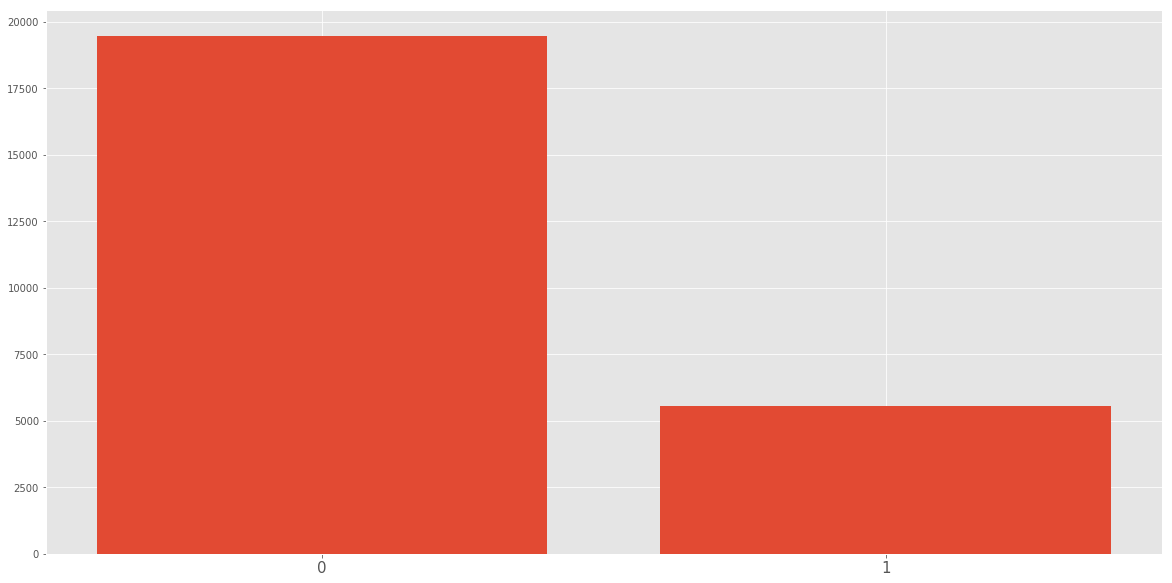

In [16]:
fig = plt.figure(figsize=(20,10))
plt.bar(train_data['Y'].value_counts().index, train_data['Y'].value_counts().values)
plt.xticks(train_data['Y'].value_counts().index,fontsize=15)
plt.show()

Method to deal with imbalanced data
1. Choose a good metrics: <br/>Confusion Matrix: recision/Recall/F1-score
2. Resampling Your Dataset:
  * You can add copies of instances from the under-represented class called over-sampling
  * use systematic algorithms to generate new instances: Synthetic Minority Over-sampling Technique
  * You can delete instances from the over-represented class, called under-sampling
  * imbalanced-learn package: https://github.com/scikit-learn-contrib/imbalanced-learn
3. Penalized Models: <br/>
比如在RandomForestClassifier里面调节class_weight={0:1,1:4}，LogisticRegression里调节 penalty, penalized-SVM
...

**4. Build a baseline model**

In [17]:
from sklearn.model_selection import train_test_split
Y = train_data['Y']
X = train_data.drop(['Y', 'id'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88      3923
          1       0.60      0.30      0.40      1077

avg / total       0.78      0.81      0.78      5000



**5. Basic parameter tuning: Grid Searching**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [20]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values
            , Y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini, score=0.786199, total=   7.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=gini, score=0.798215, total=   7.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=100, class_weight

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.786820, total=  21.8s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.787760, total=  21.8s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini .....
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.799774, total=  22.0s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.791607, total=  21.5s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.8s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=gini, score=0.789000, total=  21.8s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.784716, total=   9.7s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.800628, total=  13.8s
[CV] n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.790156, total=  13.8s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=100, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.792642, total=  15.3s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini, score=0.783937, total=  42.2s
[CV] n_estimators=300, class_weight={0: 1, 1: 3}, c

[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.2min remaining:   42.1s


[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=gini, score=0.788561, total=  47.0s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.787667, total=  35.2s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.800658, total=  33.7s
[CV] n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy ..
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.795553, total=  29.6s
[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.795088, total=  30.3s


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.5min remaining:   26.7s


[CV]  n_estimators=300, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.793099, total=  30.2s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.789237, total=  41.6s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.796128, total=  38.4s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.799605, total=  38.6s


[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.9min remaining:   12.6s


[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.791426, total=  35.1s
[CV]  n_estimators=500, class_weight={0: 1, 1: 3}, criterion=entropy, score=0.793801, total=  33.6s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


In [21]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_) 

Best score: 0.794
Best parameters set: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}
Scores: [mean: 0.79117, std: 0.00392, params: {'n_estimators': 100, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79099, std: 0.00468, params: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79136, std: 0.00500, params: {'n_estimators': 500, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini'}, mean: 0.79228, std: 0.00515, params: {'n_estimators': 100, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}, mean: 0.79441, std: 0.00419, params: {'n_estimators': 300, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}, mean: 0.79404, std: 0.00361, params: {'n_estimators': 500, 'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy'}]


**6. Model Ensemble**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression (class_weight = {0:1, 1:3})
# results from your gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.00) [Random_Forest]
Accuracy: 0.71 (+/- 0.00) [KNN]
Accuracy: 0.71 (+/- 0.05) [Logistic]
Accuracy: 0.71 (+/- 0.00) [Ensemble]


**7. Generate the final submission**

In [23]:
eclf.fit(X, Y)
y = pd.DataFrame(eclf.predict(test_data.drop(['id'],axis=1)), columns=['y'])
predict_data = pd.concat([y, test_data['id']], axis =1)
predict_data.to_csv('Submmission.csv', index=False)